## Model Building

In [629]:
library(MASS)
library(glmnet)
library(scales)

In [630]:
setwd("/home/leoKraushaar/Documents/School/Year 3/Semester 2/STAT 413/Project/protests/")

In [631]:
data <- read.csv("data/merged_data.csv")[, -1]
data$food <- NULL
data$manufac <- NULL

# data <- data[, 1:5]

head(data)

,year,month,GEO,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
1,2022,April,Alberta,4480956,17,7989056,3983,6069621
2,2022,April,British Columbia,5310164,42,8959229,77433,5240902
3,2022,April,Manitoba,1405197,2,2083495,6290,2168371
4,2022,April,New Brunswick,801778,5,1340707,1818,1171958
5,2022,April,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,April,Northwest Territories,44828,0,76390,0,58889


In [632]:
# data$pop <- rescale(data$pop)
# data$retail <- rescale(data$retail)
# data$oil <- rescale(data$oil)
# data$power <- rescale(data$power)

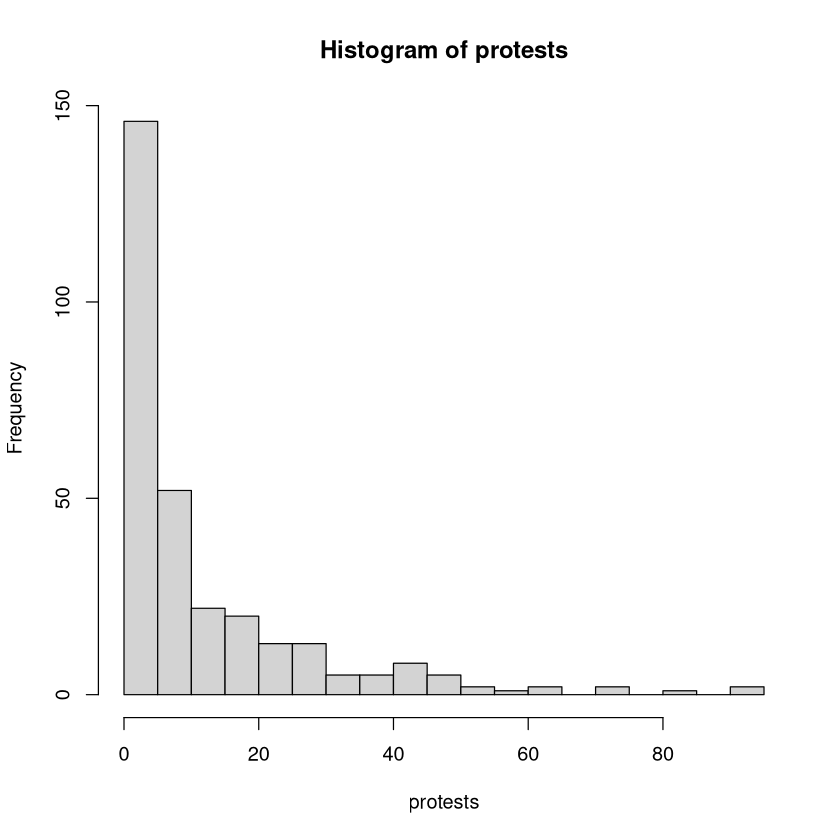

In [633]:
hist(protests, breaks=25)

In [634]:
colnames(data)[colnames(data) == "GEO"] <- "prov"
head(data)

,year,month,prov,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
1,2022,April,Alberta,4480956,17,7989056,3983,6069621
2,2022,April,British Columbia,5310164,42,8959229,77433,5240902
3,2022,April,Manitoba,1405197,2,2083495,6290,2168371
4,2022,April,New Brunswick,801778,5,1340707,1818,1171958
5,2022,April,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,April,Northwest Territories,44828,0,76390,0,58889


In [635]:
data$prov  <- as.factor(data$prov)
data$month <- as.factor(data$month)
data$year <- as.factor(data$year)

In [636]:
head(data)
attach(data)

,year,month,prov,pop,protests,retail,oil,power
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<int>,<int>
1,2022,April,Alberta,4480956,17,7989056,3983,6069621
2,2022,April,British Columbia,5310164,42,8959229,77433,5240902
3,2022,April,Manitoba,1405197,2,2083495,6290,2168371
4,2022,April,New Brunswick,801778,5,1340707,1818,1171958
5,2022,April,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,April,Northwest Territories,44828,0,76390,0,58889


The following objects are masked from data (pos = 3):

    month, oil, pop, power, protests, prov, retail, year


The following objects are masked from data (pos = 4):

    month, oil, pop, power, protests, prov, retail, year


The following objects are masked from data (pos = 5):

    month, oil, pop, power, protests, prov, retail, year


The following objects are masked from data (pos = 6):

    month, oil, pop, power, protests, prov, retail, year


The following objects are masked from data (pos = 7):

    month, oil, pop, power, protests, prov, retail, year


The following objects are masked from data (pos = 8):

    month, oil, pop, power, protests, prov, retail, year


The following objects are masked from data (pos = 9):

    month, oil, pop, power, protests, prov, retail, year


The following objects are masked from data (pos = 10):

    month, oil, pop, power, protests, prov, retail, year


The following objects are masked from data (pos = 11):

    month, oil, pop, power, pro

## Negative Binomial Model

In [637]:
model <- glm.nb(protests ~., data=data, init.theta = 1)

summary(model)


Call:
glm.nb(formula = protests ~ ., data = data, init.theta = 10.75475187, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2993  -0.9709  -0.1634   0.5407   3.0443  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    3.645e+00  1.898e+00   1.921 0.054755 .  
year2023                       1.030e-02  7.908e-02   0.130 0.896387    
monthAugust                   -7.164e-01  1.450e-01  -4.942 7.75e-07 ***
monthDecember                 -6.195e-01  1.873e-01  -3.307 0.000943 ***
monthFebruary                  5.988e-02  1.315e-01   0.455 0.648944    
monthJanuary                  -3.207e-01  1.427e-01  -2.248 0.024598 *  
monthJuly                     -5.626e-01  1.415e-01  -3.975 7.04e-05 ***
monthJune                     -3.254e-01  1.382e-01  -2.354 0.018556 *  
monthMarch                    -9.807e-02  1.339e-01  -0.732 0.463950    
monthMay                      -1.506e-02  1.317

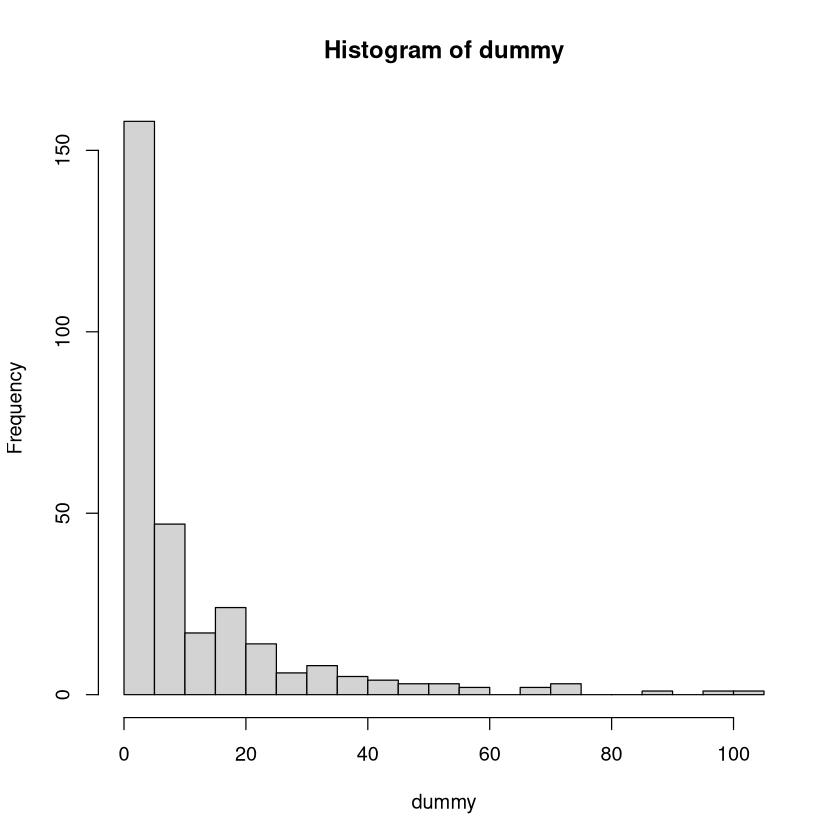

In [638]:
dummy <- rnegbin(fitted(model), theta = 10.75)

hist(dummy, breaks=25)

In [639]:
anova(model)

Warning message in anova.negbin(model):
“tests made without re-estimating 'theta'”


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,298,2368.9063,NA
year,1,1.143289e+00,297,2367.7630,2.849583e-01
month,11,8.988210e+01,286,2277.8809,1.758231e-14
prov,12,1.918190e+03,274,359.6911,0.000000e+00
pop,1,1.223328e+00,273,358.4678,2.687085e-01
retail,1,5.846439e+00,272,352.6213,1.560860e-02
oil,1,1.275936e-01,271,352.4937,7.209403e-01
power,1,4.744238e-04,270,352.4932,9.826224e-01


In [640]:
data2 <- data[, -c(1, 4, 7, 8)]

model2 <- glm.nb(protests ~., data=data2, init.theta = 1)

summary(model2)


Call:
glm.nb(formula = protests ~ ., data = data2, init.theta = 10.18063071, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2669  -0.9685  -0.1702   0.5728   3.0399  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    4.976e+00  1.179e+00   4.222 2.42e-05 ***
monthAugust                   -7.044e-01  1.452e-01  -4.850 1.24e-06 ***
monthDecember                 -6.289e-01  1.798e-01  -3.498 0.000468 ***
monthFebruary                  4.864e-02  1.314e-01   0.370 0.711202    
monthJanuary                  -3.284e-01  1.372e-01  -2.394 0.016659 *  
monthJuly                     -5.533e-01  1.419e-01  -3.900 9.63e-05 ***
monthJune                     -3.512e-01  1.401e-01  -2.507 0.012169 *  
monthMarch                    -1.060e-01  1.337e-01  -0.793 0.427836    
monthMay                      -3.083e-02  1.335e-01  -0.231 0.817414    
monthNovember                 -7.729e-02  1.34

In [641]:
anova(model2)

Warning message in anova.negbin(model2):
“tests made without re-estimating 'theta'”


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,298,2309.3533,NA
month,11,88.224132,287,2221.1292,3.711719e-14
prov,12,1867.799461,275,353.3297,0.000000e+00
retail,1,3.366263,274,349.9634,6.654454e-02
